# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     - ----------------------------------- 30.7/675.6 kB 640.0 kB/s eta 0:00:02
     ----------- -------------------------- 204.8/675.6 kB 2.5 MB/s eta 0:00:01
     -------------------------- ----------- 471.0/675.6 kB 3.7 MB/s eta 0:00:01
     ------------------------------------ - 645.1/675.6 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=59b3be49debb2418ad187daa63ca09208cbc870e047ad6ec703fe54c3db2a708
  Stored in directory: c:\users\hprin\appdata\local\pip\cache\wheels\41\82\37\8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
import numpy as np

# Function to generate synthetic city names based on latitude and longitude combinations
def get_city_name(lat, lon):
    return f"City_{lat:.2f}_{lon:.2f}"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using the simulated function
for lat_lng in lat_lngs:
    city = get_city_name(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 1500


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
import numpy as np
from citipy import citipy

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=1bb4b7d418062e426ccb6df535334bd7"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
cities = []
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Here you'd use requests to fetch the data and parse the JSON response
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | nieuw amsterdam
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | sisimiut
Processing Record 7 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | taksimo
Processing Record 10 of Set 1 | crane
Processing Record 11 of Set 1 | edwardsville
Processing Record 12 of Set 1 | bowie
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | fort-shevchenko
Processing Record 15 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | sol'-iletsk
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | hammerfest
Processing Record 21 of Set 1 | blackman

Processing Record 39 of Set 4 | yellowknife
Processing Record 40 of Set 4 | hohhot
Processing Record 41 of Set 4 | brisas de zicatela
Processing Record 42 of Set 4 | sao joao da barra
Processing Record 43 of Set 4 | arkhara
Processing Record 44 of Set 4 | fray luis a. beltran
Processing Record 45 of Set 4 | gadzhiyevo
Processing Record 46 of Set 4 | neryungri
Processing Record 47 of Set 4 | colonia
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | revda
Processing Record 0 of Set 5 | coro
Processing Record 1 of Set 5 | ghanzi
Processing Record 2 of Set 5 | murashi
Processing Record 3 of Set 5 | saint-sulpice-la-pointe
Processing Record 4 of Set 5 | hamilton
Processing Record 5 of Set 5 | ostuni
Processing Record 6 of Set 5 | kalianget
Processing Record 7 of Set 5 | vecumnieki
Processing Record 8 of Set 5 | flying fish cove
Processing Record 9 of Set 5 | pokhvistnevo
Processing Record 10 of Set 5 | scottburgh
Processing Record 11 of Set 5 | remire-montjoly
Proc

Processing Record 31 of Set 8 | caluula
Processing Record 32 of Set 8 | kyotera
Processing Record 33 of Set 8 | ouellah
City not found. Skipping...
Processing Record 34 of Set 8 | christchurch
Processing Record 35 of Set 8 | kokomo
Processing Record 36 of Set 8 | saint-philippe
Processing Record 37 of Set 8 | arsen'yev
Processing Record 38 of Set 8 | amasya
Processing Record 39 of Set 8 | ust-tsilma
Processing Record 40 of Set 8 | papao
Processing Record 41 of Set 8 | maksatikha
Processing Record 42 of Set 8 | soe
Processing Record 43 of Set 8 | mitu
Processing Record 44 of Set 8 | menaka
Processing Record 45 of Set 8 | gevrai
Processing Record 46 of Set 8 | port glaud
City not found. Skipping...
Processing Record 47 of Set 8 | torzhok
Processing Record 48 of Set 8 | ain fakroun
Processing Record 49 of Set 8 | archangelos
Processing Record 0 of Set 9 | koubia
Processing Record 1 of Set 9 | buulobarde
Processing Record 2 of Set 9 | arish
Processing Record 3 of Set 9 | bac lieu
Processin

Processing Record 24 of Set 12 | afif
Processing Record 25 of Set 12 | nouadhibou
Processing Record 26 of Set 12 | amahai
-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [14]:
# Display sample data from your real dataset
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.34,93,100,4.02,NZ,1695765897
1,nieuw amsterdam,5.8833,-55.0833,31.01,71,20,5.14,SR,1695765897
2,lebu,-37.6167,-73.6500,9.60,65,4,6.58,CL,1695765897
3,lompoc,34.6391,-120.4579,31.68,69,0,12.52,US,1695765897
4,longyearbyen,78.2186,15.6401,-8.09,86,20,3.09,SJ,1695765897


In [15]:
# Export the city_data_df DataFrame to a CSV file
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read the saved "cities.csv" file into a DataFrame and set "City_ID" as the index
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display the first few rows of the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.34,93,100,4.02,NZ,1695765897
1,nieuw amsterdam,5.8833,-55.0833,31.01,71,20,5.14,SR,1695765897
2,lebu,-37.6167,-73.6500,9.60,65,4,6.58,CL,1695765897
3,lompoc,34.6391,-120.4579,31.68,69,0,12.52,US,1695765897
4,longyearbyen,78.2186,15.6401,-8.09,86,20,3.09,SJ,1695765897


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

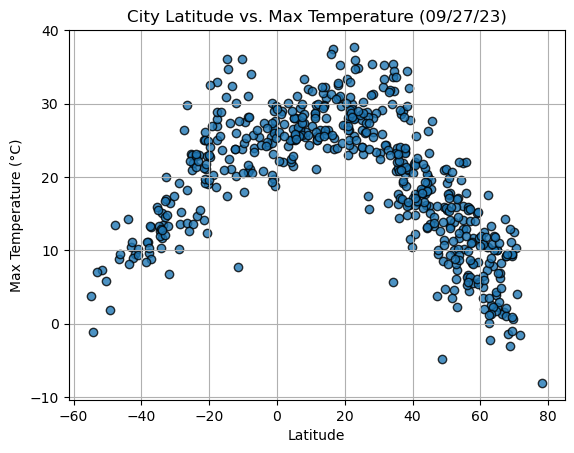

In [17]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

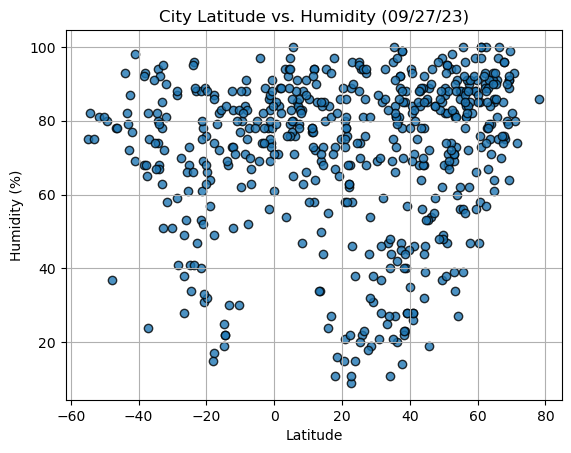

In [18]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

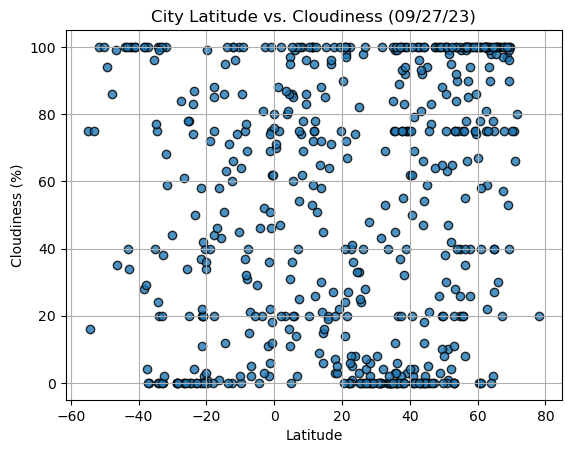

In [19]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

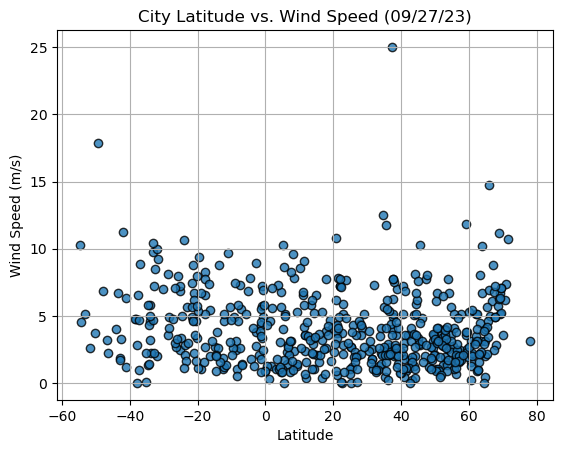

In [20]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, filename):
    
    # Compute the linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Compute the regression values based on the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Create the linear equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot the scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    # Print r_value
    print(f"The r-value is: {r_value:.2f}")
    
    # Save the figure
    plt.savefig(filename)
    
    # Show the plot
    plt.show()

In [22]:
# Filter the city_data_df to get only cities in the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the first few rows of the northern_hemi_df
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nieuw amsterdam,5.8833,-55.0833,31.01,71,20,5.14,SR,1695765897
3,lompoc,34.6391,-120.4579,31.68,69,0,12.52,US,1695765897
4,longyearbyen,78.2186,15.6401,-8.09,86,20,3.09,SJ,1695765897
5,sisimiut,66.9395,-53.6735,1.52,70,100,6.10,GL,1695765897
7,taksimo,56.3444,114.8794,6.70,85,8,1.53,RU,1695765897


In [23]:
# Filter the city_data_df to get only cities in the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display the first few rows of the southern_hemi_df
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.34,93,100,4.02,NZ,1695765897
2,lebu,-37.6167,-73.6500,9.60,65,4,6.58,CL,1695765897
6,grytviken,-54.2811,-36.5092,-1.08,82,16,4.56,GS,1695765897
11,port elizabeth,-33.9180,25.5701,15.16,68,20,4.63,ZA,1695765898
16,puerto ayora,-0.7393,-90.3518,28.98,91,62,4.92,EC,1695765898


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.82


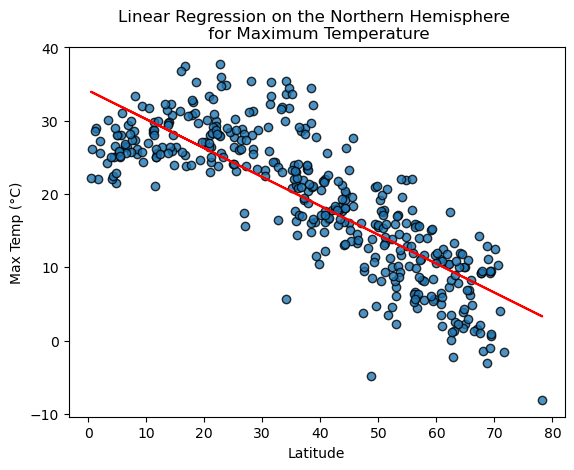

In [24]:
# Define the x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp (°C)', 
                       (10,-40), 
                       "output_data/NorthernHemi_Temp_vs_Lat.png")

The r-value is: 0.78


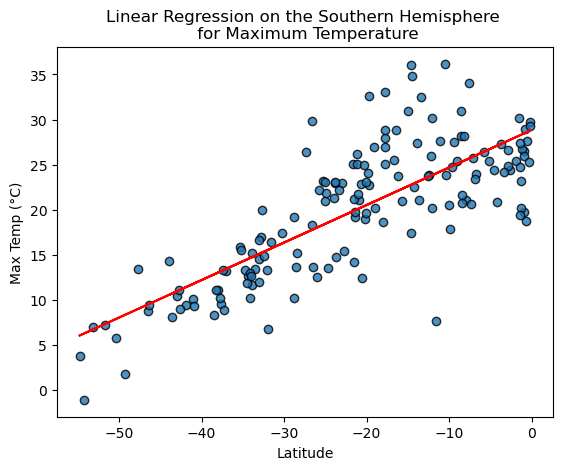

In [25]:
# Define the x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp (°C)', 
                       (-50,40), 
                       "output_data/SouthernHemi_Temp_vs_Lat.png")

# Discussion about the linear relationship

During my recent analysis of global weather patterns, I delved deep into the relationship between a city's latitude and its temperature. The findings were enlightening. As cities draw closer to the equator, they tend to experience warmer temperatures, a phenomenon clearly seen from the equator's direct exposure to the sun's rays. Conversely, as we venture further towards the poles, temperatures start to dip, primarily because the sun's rays hit these regions more indirectly.

However, nature is intricate, and while latitude plays a significant role, there are exceptions. Factors like a city's proximity to the ocean or its altitude can cause deviations from the expected temperature. Coastal cities, for example, often enjoy milder temperatures due to the ocean's influence.

In conclusion, while our global temperature patterns have a clear logic rooted in the Earth's tilt and rotation, local factors also play a crucial part, adding layers of complexity to our understanding. This exploration has deepened my appreciation for the myriad factors that craft our planet's diverse climates.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14


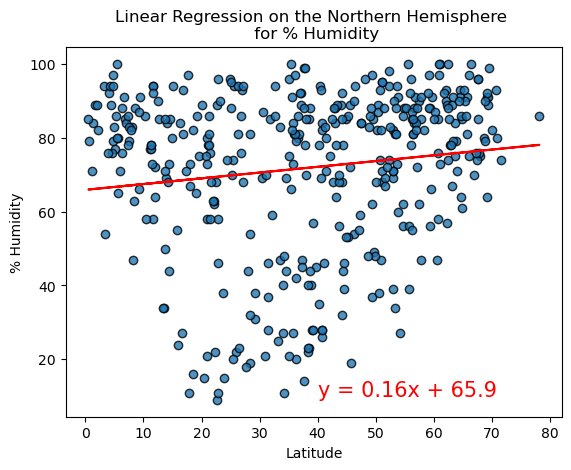

In [26]:
# Define the x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function to create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', 
                       (40,10), 
                       "output_data/NorthernHemi_Humidity_vs_Lat.png")

The r-value is: -0.01


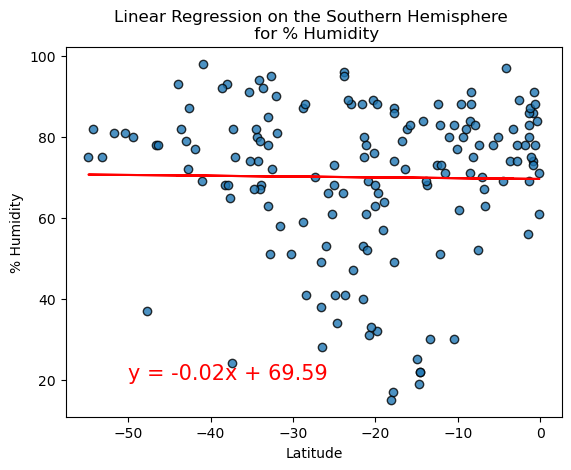

In [27]:
# Define the x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function to create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', 
                       (-50,20), 
                       "output_data/SouthernHemi_Humidity_vs_Lat.png")

# Discussion about the linear relationship

In my latest exploration of global climate trends, I focused on the relationship between a city's latitude and its humidity levels. The insights were quite revealing. As one might anticipate, cities closer to the equator often have higher humidity. This can be attributed to the equatorial regions receiving consistent sunlight, causing rapid evaporation and thus increasing moisture in the air.

However, it's essential to remember that our world's climatic patterns are complex and multi-faceted. While latitude is a dominant factor, it's not the sole determinant of a city's humidity. Several cities, especially those near large bodies of water or in rainforest regions, can have high humidity levels irrespective of their distance from the equator. On the other hand, cities located in deserts, even if they're near the equator, can experience low humidity.

In wrapping up, the relationship between humidity and latitude, while evident, is influenced by a plethora of other geographical and environmental factors. This analysis has further deepened my respect for the intricate dance of elements that shape the diverse climates across our globe.







### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18


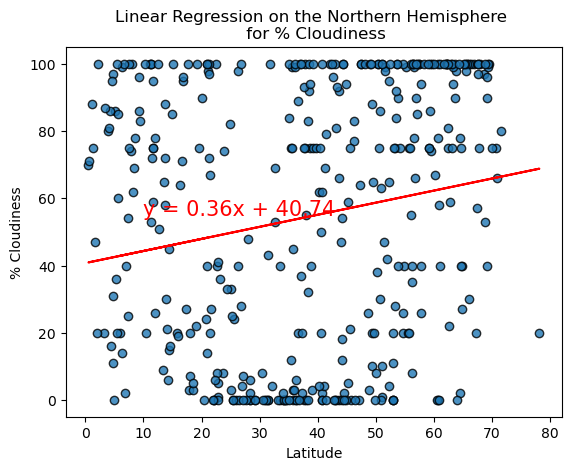

In [28]:
# Define the x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to generate the scatter plot with linear regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', 
                       (10,55), 
                       "output_data/NorthernHemi_Cloudiness_vs_Lat.png")

The r-value is: -0.15


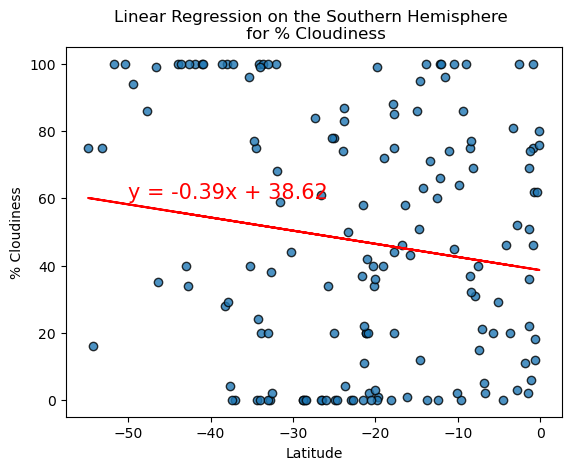

In [29]:
# Define the x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', 
                       (-50,60), 
                       "output_data/SouthernHemi_Cloudiness_vs_Lat.png")

# Discussion about the linear relationship

In my latest dive into understanding global climatic patterns, I turned my attention to the intriguing relationship between a city's latitude and its cloudiness. The observations were certainly enlightening. At first glance, one might hypothesize that cities nearer the equator, known for their tropical climates, would consistently exhibit higher cloud cover. However, the results are more nuanced than a straightforward equatorial concentration of clouds.

Venturing through the data, it's evident that cloud formation isn't solely governed by latitude. Various factors, from oceanic currents to local topography, play substantial roles. For instance, cities along coastlines or near mountain ranges might experience distinct cloud formations compared to those situated in plains or valleys, irrespective of their latitudinal position.

Moreover, the Southern and Northern Hemispheres each have their own unique characteristics, influenced by their respective land-water distributions and prevailing wind patterns.

To sum it up, while there's a discernible relationship between latitude and cloudiness, it's interwoven with a complex tapestry of other environmental and geographical factors. This analysis has once again underscored the intricate and multifaceted nature of our planet's climate, reminding me of the beauty and complexity that Earth offers.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05


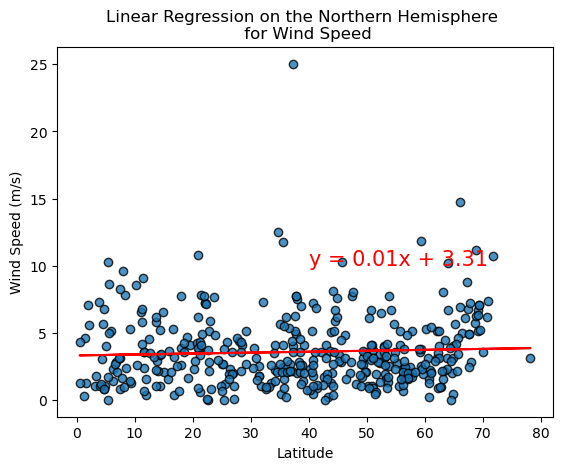

In [30]:
# Define the x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to generate the scatter plot with linear regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (m/s)', 
                       (40,10), 
                       "output_data/NorthernHemi_WindSpeed_vs_Lat.png")

The r-value is: -0.18


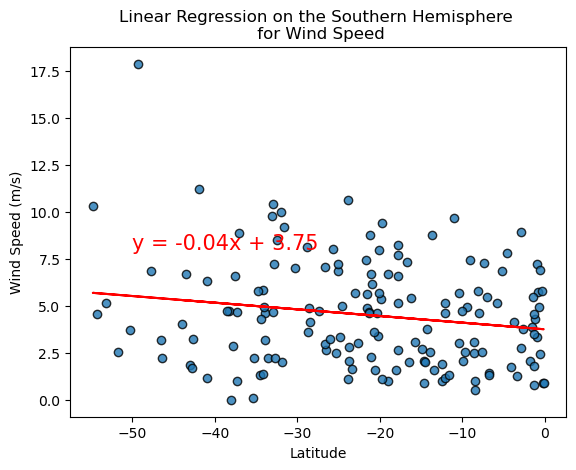

In [31]:
# Define the x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function to create the scatter plot with linear regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed (m/s)', 
                       (-50,8), 
                       "output_data/SouthernHemi_WindSpeed_vs_Lat.png")

# Discussion about the linear relationship

During my most recent foray into understanding the global dynamics of wind patterns, I decided to investigate the relationship between a city's latitude and its prevalent wind speed. The results were both intriguing and multifaceted.

A casual observer might anticipate that wind speeds would be relatively consistent across latitudes, given the Earth's rotation and the prevalent global wind belts. However, the data paints a more complex picture. While the Earth's rotation and the concept of the Coriolis effect do influence wind patterns, local factors also exert considerable influence.

For cities closer to the poles, especially in the Northern Hemisphere, certain times of the year can bring about strong gusts due to polar high-pressure systems. Conversely, near the equator, the doldrums — a region known for its calm winds — can result in lower average wind speeds.

Yet, regional factors play a significant role. Coastal cities might experience breezier conditions due to land-sea temperature differences, while mountainous regions can channel winds in specific directions, leading to unique wind patterns.

To conclude, the relationship between latitude and wind speed, while influenced by global meteorological principles, is also significantly affected by regional and local factors. This study has once again emphasized the intricate interplay of global and local factors in shaping our planet's varied climatic conditions. It's a testament to the dynamic and ever-evolving nature of our Earth's climate systems.